In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [2]:
import shap

In [3]:
df_dbt = pd.read_csv('./data/diabetes_binary_health_indicators_BRFSS2015.csv')
print(df_dbt.shape)

(253680, 22)


In [4]:
df_dbt.head(2)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [5]:
df_dbt['Diabetes_binary'].value_counts(dropna=False, normalize=True)

0.0    0.860667
1.0    0.139333
Name: Diabetes_binary, dtype: float64

# Split Data to Train/Test

In [6]:
df_train, df_test = train_test_split(df_dbt, test_size=0.2, random_state=42)


X = df_dbt.drop('Diabetes_binary', axis=1)
y = df_dbt[['Diabetes_binary']]

X_train = df_train.drop('Diabetes_binary', axis=1)
X_test = df_test.drop('Diabetes_binary', axis=1)

y_train = df_train[['Diabetes_binary']]
y_test = df_test[['Diabetes_binary']]

print(X_train.shape, X_test.shape)

(202944, 21) (50736, 21)


In [7]:
y_test.value_counts(normalize=True)

Diabetes_binary
0.0                0.86209
1.0                0.13791
dtype: float64

# Data Preprocessing

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled.index = X_train.index
X_train_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
31141,-0.865390,1.166346,0.196705,-1.266092,1.121615,-0.205655,-0.322556,0.566448,0.759129,0.481542,-0.243971,0.226927,-0.303036,-0.479136,-0.429902,-0.487197,-0.449845,1.127175,1.299401,0.962174,0.939707
98230,-0.865390,-0.857379,0.196705,0.851152,-0.891572,-0.205655,-0.322556,0.566448,-1.317300,0.481542,-0.243971,0.226927,-0.303036,0.456986,-0.429902,-0.487197,-0.449845,1.127175,-0.010752,-0.051302,0.939707
89662,1.155549,1.166346,0.196705,-0.661165,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,-0.243971,0.226927,-0.303036,-0.479136,-0.429902,0.086139,-0.449845,1.127175,1.299401,-0.051302,-0.025387
208255,-0.865390,1.166346,0.196705,-0.207470,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,-0.243971,0.226927,-0.303036,-1.415258,-0.429902,-0.487197,-0.449845,1.127175,-0.993367,0.962174,0.457160
233415,-0.865390,1.166346,0.196705,-0.661165,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,-0.243971,0.226927,-0.303036,0.456986,-0.429902,-0.487197,2.222989,-0.887173,1.299401,-1.064778,-0.025387


In [9]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns
X_test_scaled.index = X_test.index
X_test_scaled.head(2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,-0.865390,-0.857379,0.196705,-1.114860,-0.891572,-0.205655,-0.322556,-1.765388,0.759129,0.481542,-0.243971,0.226927,-0.303036,0.456986,-0.025950,0.315474,-0.449845,-0.887173,-0.338290,-1.064778,-1.955575
132821,1.155549,1.166346,0.196705,-0.056238,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,-0.243971,0.226927,-0.303036,0.456986,-0.429902,-0.487197,-0.449845,-0.887173,1.626939,0.962174,-0.025387


# Modeling

In [10]:
results = pd.DataFrame(columns=['Model', 'Train Score', 'CV Score', 'Test Score', 'Params'])


## Logistic Rergession

In [12]:
model_name = 'Logistic Regression'
model_idx = 0

model = LogisticRegression(random_state=42, max_iter=500)

param_grids = {'penalty': [None, 'l2'], 
               'C': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(model, param_grids, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

# train_score = f1_score(y_train, grid_search.predict(X_train_scaled), average='macro')
cv_score = grid_search.best_score_
# test_score = f1_score(y_test, grid_search.predict(X_test_scaled), average='macro')

# results.loc[model_idx] = [model_name, train_score, cv_score, test_score, grid_search.best_params_]
model_lr = grid_search.best_estimator_

In [13]:
model_lr.intercept_

array([-2.40633314])

In [14]:
# find the right threshold for cutting prediction
y_pred = model_lr.predict_proba(X_train_scaled)[:, 1]
list_f1score_lr = []
for i in np.arange(0, 1, 0.01):
    
    list_f1score_lr.append(f1_score(y_train, y_pred>=i, average='macro'))

ind_lr = np.argmax(list_f1score_lr)

f1_thresh_lr = np.arange(0, 1, 0.01)[ind_lr]
print(f1_thresh_lr)

train_score = f1_score(y_train, model_lr.predict_proba(X_train_scaled)[:, 1]>f1_thresh_lr, average='macro')
test_score = f1_score(y_test, model_lr.predict_proba(X_test_scaled)[:, 1]>f1_thresh_lr, average='macro')
results.loc[model_idx] = [model_name, train_score, cv_score, test_score, grid_search.best_params_]
results

0.25


,Model,Train Score,CV Score,Test Score,Params
0,Logistic Regression,0.67379,0.581483,0.672783,"{'C': 0.01, 'penalty': None}"


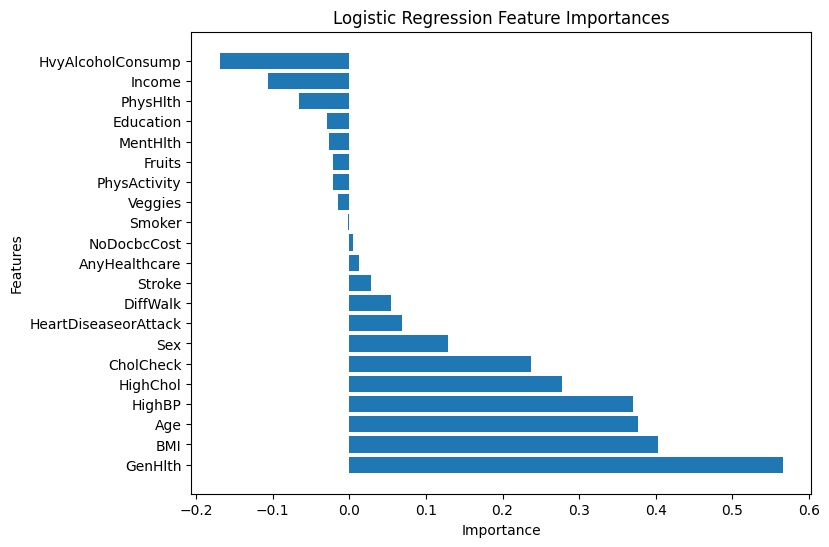

In [15]:
# Create DataFrame and sort
feature_df = pd.DataFrame({'feature': model_lr.feature_names_in_, 'importance': model_lr.coef_[0]})
feature_df = feature_df.sort_values(by='importance', ascending=False)  

# Plot the feature importances
plt.figure(figsize=(8, 6))  # Adjust figure size as needed 
plt.barh(feature_df['feature'], feature_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Logistic Regression Feature Importances')
plt.show()

In [16]:
feature_df

,feature,importance
13,GenHlth,0.566442
3,BMI,0.402363
18,Age,0.376252
0,HighBP,0.370684
1,HighChol,0.277440
2,CholCheck,0.237602
17,Sex,0.128224
6,HeartDiseaseorAttack,0.068378
16,DiffWalk,0.053912
5,Stroke,0.028000


### SM

In [18]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logit_model = sm.Logit(y_train, sm.add_constant(X_train_scaled))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.320710
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               202944
Model:                          Logit   Df Residuals:                   202922
Method:                           MLE   Df Model:                           21
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                  0.2069
Time:                        18:37:43   Log-Likelihood:                -65086.
converged:                       True   LL-Null:                       -82070.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4063      0.010   -242.618      0.000      -2.426      -2.387

In [19]:
y_pred = result.predict(sm.add_constant(X_test_scaled))


In [20]:
print('Accuracy:', accuracy_score(y_test, y_pred>0.5))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred>0.5))
print(classification_report(y_test, y_pred>0.5))

Accuracy: 0.865874329864396
Confusion Matrix:
 [[42773   966]
 [ 5839  1158]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



## Decision Tree

In [21]:
model_name = 'Decision Tree'
model_idx = 1

model = DecisionTreeClassifier(random_state=42)

param_grids = {'max_depth': [3, 5,
                             7, 9, 11],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(model, param_grids, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

# train_score = f1_score(y_train, grid_search.predict(X_train_scaled), average='macro')
cv_score = grid_search.best_score_
# test_score = f1_score(y_test, grid_search.predict(X_test_scaled), average='macro')

# results.loc[model_idx] = [model_name, train_score, cv_score, test_score, grid_search.best_params_]
model_dt = grid_search.best_estimator_

In [23]:
model_name = 'Decision Tree'
model_idx = 1

# find the right threshold for cutting prediction
y_pred = model_dt.predict_proba(X_train_scaled)[:, 1]
list_f1score_dt = []
for i in np.arange(0, 1, 0.01):
    
    list_f1score_dt.append(f1_score(y_train, y_pred>=i, average='macro'))

ind_dt = np.argmax(list_f1score_dt)

f1_thresh_dt = np.arange(0, 1, 0.01)[ind_dt]
print(f1_thresh_dt)

train_score = f1_score(y_train, model_dt.predict_proba(X_train_scaled)[:, 1]>f1_thresh_dt, average='macro')
test_score = f1_score(y_test, model_dt.predict_proba(X_test_scaled)[:, 1]>f1_thresh_dt, average='macro')
results.loc[model_idx] = [model_name, train_score, cv_score, test_score, grid_search.best_params_]
results

0.29


,Model,Train Score,CV Score,Test Score,Params
0,Logistic Regression,0.673790,0.581483,0.672783,"{'C': 0.01, 'penalty': None}"
1,Decision Tree,0.699446,0.585387,0.670852,"{'criterion': 'gini', 'max_depth': 11, 'min_sa..."


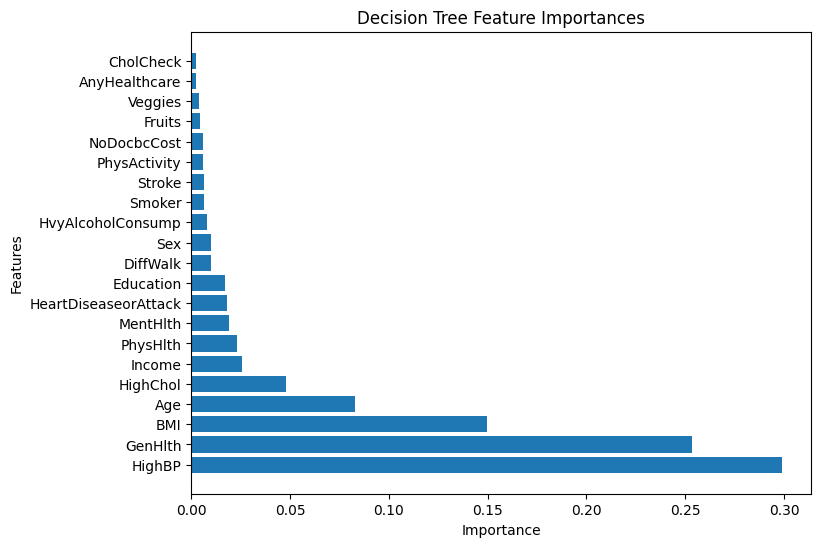

In [24]:
# Extract feature importances
importances = model_dt.feature_importances_

# Create DataFrame and sort
feature_df = pd.DataFrame({'feature': X_train_scaled.columns, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)  

# Plot the feature importances
plt.figure(figsize=(8, 6))  # Adjust figure size as needed 
plt.barh(feature_df['feature'], feature_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Decision Tree Feature Importances')
plt.show()

In [25]:
feature_df

,feature,importance
0,HighBP,0.298952
13,GenHlth,0.253291
3,BMI,0.149555
18,Age,0.083001
1,HighChol,0.047690
20,Income,0.025387
15,PhysHlth,0.022906
14,MentHlth,0.018947
6,HeartDiseaseorAttack,0.017918
19,Education,0.017062


## Random Forest

In [ ]:
model_name = 'Random Forest'
model_idx = 2

model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grids = {'n_estimators': [50, 100, 200,
                                300, 500],
                'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
               'max_depth': [3, 5, 7, 9, 11]}

grid_search = GridSearchCV(model, param_grids, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

# train_score = f1_score(y_train, grid_search.predict(X_train_scaled), average='macro')
cv_score = grid_search.best_score_
# test_score = f1_score(y_test, grid_search.predict(X_test_scaled), average='macro')

# results.loc[model_idx] = [model_name, train_score, cv_score, test_score, grid_search.best_params_]
model_rf = grid_search.best_estimator_

In [ ]:
model_name = 'Random Forest'
model_idx = 2

# find the right threshold for cutting prediction
y_pred = model_rf.predict_proba(X_train_scaled)[:, 1]
list_f1score_rf = []
for i in np.arange(0, 1, 0.01):
    
    list_f1score_rf.append(f1_score(y_train, y_pred>=i, average='macro'))

ind_rf = np.argmax(list_f1score_rf)

f1_thresh_rf = np.arange(0, 1, 0.01)[ind_rf]
print(f1_thresh_rf)

train_score = f1_score(y_train, model_rf.predict_proba(X_train_scaled)[:, 1]>f1_thresh_rf, average='macro')
test_score = f1_score(y_test, model_rf.predict_proba(X_test_scaled)[:, 1]>f1_thresh_rf, average='macro')
results.loc[model_idx] = [model_name, train_score, cv_score, test_score, grid_search.best_params_]
results

In [ ]:
# Extract feature importances
importances = model_rf.feature_importances_

# Create DataFrame and sort
feature_df = pd.DataFrame({'feature': X_train_scaled.columns, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)  

# Plot the feature importances
plt.figure(figsize=(8, 6))  # Adjust figure size as needed 
plt.barh(feature_df['feature'], feature_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Random Forest Feature Importances')
plt.show()

In [ ]:
feature_df


## All models performance

In [ ]:
results = results.sort_values('Test Score', ascending=False)
# Model Performance Comparison (F1-Score)
plt.bar(results['Model'], results['Test Score'])
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Model Performance Comparison (Testing Dataset)')
plt.show()

In [ ]:
results

My models have performance of F1-Scores higher than this notebook in the Kaggle.
https://www.kaggle.com/code/ohoodalsohaime/diabetes-indicators-classfication-project-part1